In [1]:
import pandas as pd

#Read EgoAlterProfiles.txt
EgoAlterProfiles = pd.read_csv("Testing Propositions Twitter/dataverse_files/EgoAlterProfiles.txt",sep="\t")

'''
#Read EgoNetworks.text
EgoNetworks = pd.read_csv("Testing Propositions Twitter/dataverse_files/EgoNetworks.txt",sep="\t")

#Read EgoTimelines.text
EgoTimelines = pd.read_csv("Testing Propositions Twitter/dataverse_files/EgoTimelines.txt", encoding = 'ISO-8859-1', sep="\t")

#Read Exposure
Exposure = pd.read_csv("Testing Propositions Twitter/dataverse_files/Exposure.txt",sep="\t")

#Read MANIFEST
Manifest = pd.read_csv("Testing Propositions Twitter/dataverse_files/MANIFEST.txt",sep="\t")
'''

'\n#Read EgoNetworks.text\nEgoNetworks = pd.read_csv("Testing Propositions Twitter/dataverse_files/EgoNetworks.txt",sep="\t")\n\n#Read EgoTimelines.text\nEgoTimelines = pd.read_csv("Testing Propositions Twitter/dataverse_files/EgoTimelines.txt", encoding = \'ISO-8859-1\', sep="\t")\n\n#Read Exposure\nExposure = pd.read_csv("Testing Propositions Twitter/dataverse_files/Exposure.txt",sep="\t")\n\n#Read MANIFEST\nManifest = pd.read_csv("Testing Propositions Twitter/dataverse_files/MANIFEST.txt",sep="\t")\n'

In [3]:
EgoAlterProfiles

,ID,IsEgo,followers_count,friends_count,statuses_count,utc_offset,lang,created_at,protected
0,1,True,30.0,28,9.0,NaN,en,Wed Oct 26 03:30:32 +0000 2011,False
1,2,True,2.0,8,7.0,-14400.0,en,Mon Jul 27 20:46:32 +0000 2009,False
2,3,True,1.0,0,0.0,NaN,fr,Mon Apr 23 20:57:26 +0000 2012,False
3,4,True,3.0,3,68.0,NaN,en,Sun Feb 14 07:50:39 +0000 2010,False
4,5,True,65.0,118,748.0,NaN,fr,Mon Jun 11 14:17:06 +0000 2012,False
...,...,...,...,...,...,...,...,...,...
2516185,2516186,False,5129.0,191,403.0,10800.0,ar,Mon Jun 23 22:56:28 +0000 2014,False
2516186,2516187,False,6694.0,11,1523.0,-14400.0,en,Wed Jul 08 09:10:18 +0000 2009,False
2516187,2516188,False,6651.0,216,7141.0,-18000.0,en,Thu Jun 16 00:06:46 +0000 2011,False
2516188,2516189,False,21.0,59,33.0,NaN,en,Fri Nov 30 05:31:27 +0000 2012,False


In [14]:
egos = EgoAlterProfiles.loc[EgoAlterProfiles['IsEgo'] == True]
tweets = egos['statuses_count']
tweets

0          9.0
1          7.0
2          0.0
3         68.0
4        748.0
         ...  
34001      0.0
34002    370.0
34003      0.0
34004      0.0
34005      0.0
Name: statuses_count, Length: 34006, dtype: float64

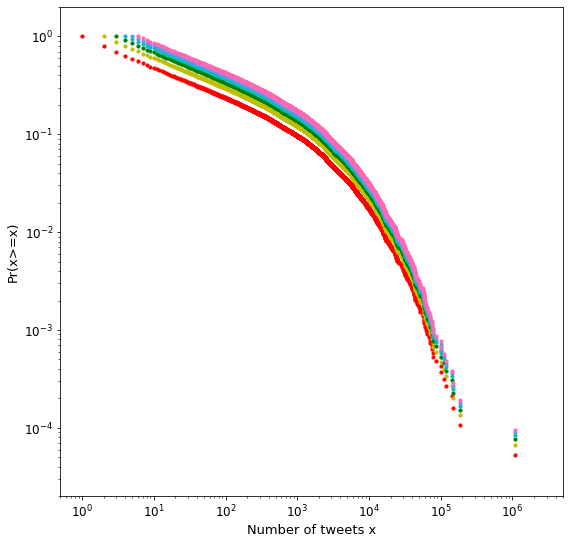

In [2]:
import numpy as np
#import matplotlib
#matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt

egos = EgoAlterProfiles.loc[EgoAlterProfiles['IsEgo'] == True]
tweets = egos['statuses_count']
tweets_sorted = np.sort(tweets)
#cdf = np.array(range(len(tweets_sorted)))/float(len(tweets_sorted))
#ccdf = 1-cdf

fig = plt.figure(figsize=(9,9))
plt.xlim(0.5, 5e6)
plt.ylim(2e-5, 2e0)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of tweets x', fontsize=13)
plt.ylabel('Pr(x>=x)', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=12)

TWEETS, CCDF = [],[]
colors = ['r', 'y', 'g', 'c', 'cornflowerblue', 'hotpink']

N = 6
for i in range(N):
    tweets_sorted_i = tweets_sorted[tweets_sorted>i]
    TWEETS.append(tweets_sorted_i)
    
    cdf_i = np.array(range(len(tweets_sorted_i)))/float(len(tweets_sorted_i))

    ccdf_i = 1-cdf_i

    CCDF.append(ccdf_i[:len(tweets_sorted_i)])
    
    d_i = {'Tweets':TWEETS[i],'CCDF':CCDF[i]}
    df_i = pd.DataFrame(d_i, columns = ['Tweets','CCDF'])
    df_unique_i = df_i.drop_duplicates(subset=['Tweets'])
    
    plt.scatter(df_unique_i.Tweets, df_unique_i.CCDF, color=colors[i], s=10, marker='o')
        
    #plt.scatter(TWEETS[i], CCDF[i], color=colors[i], s=10, marker='o')




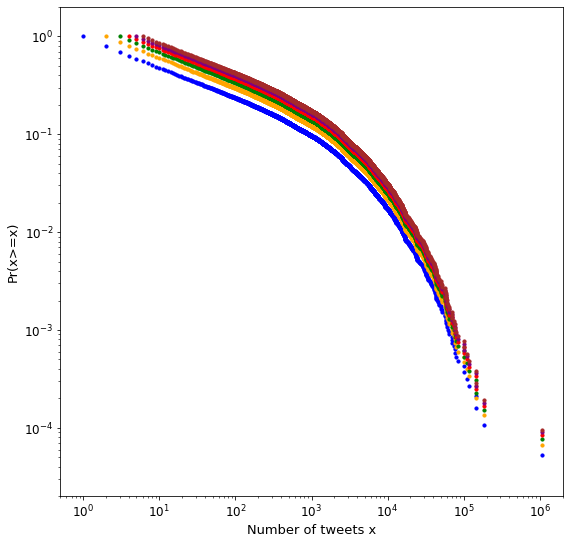

In [90]:
'''
d0 = {'Tweets':TWEETS[0],'CCDF':CCDF[0]}
df0 = pd.DataFrame(d, columns = ['Tweets','CCDF'])
df0_unique = df0.drop_duplicates(subset=['Tweets'],inplace=True)
print(d0)

d = {'Tweets':TWEETS[0],'CCDF':CCDF[0]}
df = pd.DataFrame(d, columns = ['Tweets','CCDF'])
df_uni = df.drop_duplicates(subset=['Tweets'])
df_uni
'''
fig = plt.figure(figsize=(9,9))
plt.xlim(0.5, 2e6)
plt.ylim(2e-5, 2e0)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of tweets x', fontsize=13)
plt.ylabel('Pr(x>=x)', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=12)

for i in range(N):
    d_i = {'Tweets':TWEETS[i],'CCDF':CCDF[i]}
    df_i = pd.DataFrame(d_i, columns = ['Tweets','CCDF'])
    df_unique_i = df_i.drop_duplicates(subset=['Tweets'])
    
    plt.scatter(df_unique_i.Tweets, df_unique_i.CCDF, color=colors[i], s=10, marker='o')


In [88]:
df_unique_i

,Tweets,CCDF
0,6.0,1.000000
488,7.0,0.953448
871,8.0,0.916913
1212,9.0,0.884384
1497,10.0,0.857197
...,...,...
10478,117375.0,0.000477
10479,143685.0,0.000382
10480,147067.0,0.000286
10481,183715.0,0.000191


In [44]:
from scipy.special import smirnov

In [121]:
x = EgoAlterProfiles['statuses_count']
x

0             9.0
1             7.0
2             0.0
3            68.0
4           748.0
            ...  
2516185     403.0
2516186    1523.0
2516187    7141.0
2516188      33.0
2516189       3.0
Name: statuses_count, Length: 2516190, dtype: float64

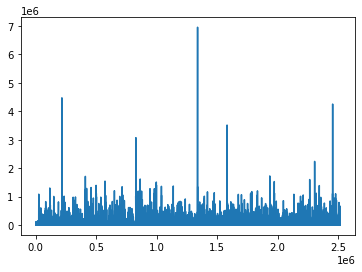

In [110]:
plt.plot(x)

In [ ]:

for i in range():
    plt.scatter(x[i], y[i], color=colors[i])

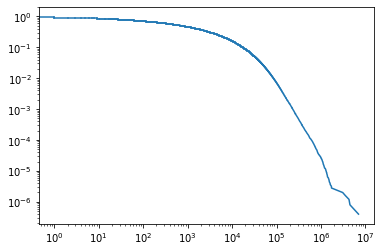

In [133]:
import numpy as np

X2 = np.sort(x)
F2 = np.array(range(len(x)))/float(len(x))

plt.plot(X2,1-F2)
plt.yscale('log')
plt.xscale('log')

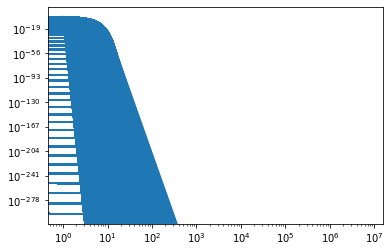

In [120]:
from scipy import stats
import matplotlib.pyplot as plt

#scipy.stats.rv_continuous.sf(EgoAlterProfiles['statuses_count'])

c = stats.norm.sf(x,loc=0,scale=1) #loc=mean, scale=sd
plt.plot(x,c)
plt.xscale('log')
plt.yscale('log')
#plt.rcParams['agg.path.chunksize'] = 1000


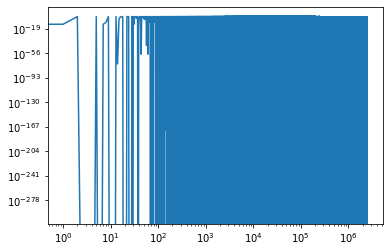

In [94]:
from scipy.stats import norm
import matplotlib.pyplot as plt
r = norm.sf(x, loc=0,scale=1)
plt.plot(r)
plt.xscale('log') #x-axis on log scale
plt.yscale('log') #y-axis on log scale

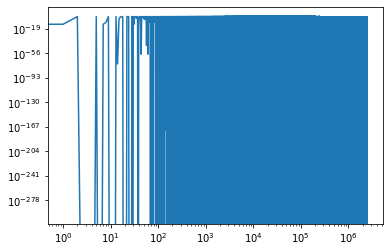

In [95]:
r = stats.norm.sf(x, loc=0,scale=1)

plt.figure()
plt.plot(r)
plt.xscale('log')
plt.yscale('log') #y-axis on log scale
plt.show()
plt.rcParams['agg.path.chunksize'] = 1
